<a href="https://colab.research.google.com/github/klauberbarros/banco-investimentos-sqlite/blob/main/Identificacao_de_fraudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as pastas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Carregar o dataset
df = pd.read_csv('/content/credit_card_transactions_fraud.csv')

In [8]:
# Exibir as primeiras linhas do dataset
print(df.head())


  transaction_id     transaction_date  transaction_amount card_type  \
0       TX100294  2023-02-02 08:39:18               33.97   Crédito   
1       TX100313  2023-03-08 11:47:00              821.84   Crédito   
2       TX100223  2023-09-17 04:31:25              114.60   Crédito   
3       TX100044  2023-05-30 02:49:57               74.86    Débito   
4       TX100330  2023-12-14 12:16:59              110.00   Crédito   

  transaction_type merchant_category   location device_used  is_international  \
0           Compra       Restaurante  São Paulo      Mobile                 1   
1           Compra            Roupas   Curitiba     Desktop                 1   
2    Transferência            Viagem     Recife     Desktop                 1   
3           Compra        E-commerce     Recife      Mobile                 1   
4            Saque            Roupas     Recife      Mobile                 1   

   num_prev_transactions_24h  is_fraud  
0                          6         1  
1   

In [9]:
# Tratamento de dados faltantes nas colunas numéricas
df_num = df.select_dtypes(include=['float64', 'int64'])
df[df_num.columns] = df_num.fillna(df_num.mean())


In [10]:
# Converter variáveis categóricas para variáveis numéricas
df = pd.get_dummies(df, columns=['card_type', 'transaction_type', 'merchant_category', 'location', 'device_used'], drop_first=True)

In [11]:
# Separar as variáveis independentes (X) e a variável dependente (y)
X = df.drop(['transaction_id', 'transaction_date', 'is_fraud'], axis=1)  # Remove colunas irrelevantes
y = df['is_fraud']

In [12]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
#tratamento dos nulos
print(df.dtypes)
print("Nulos por coluna:\n", df.isna().sum())
print("Duplicatas (todas as colunas):", df.duplicated().sum())

transaction_id                     object
transaction_date                   object
transaction_amount                float64
is_international                    int64
num_prev_transactions_24h           int64
is_fraud                            int64
card_type_Débito                     bool
transaction_type_Saque               bool
transaction_type_Transferência       bool
merchant_category_Eletrônicos        bool
merchant_category_Restaurante        bool
merchant_category_Roupas             bool
merchant_category_Supermercado       bool
merchant_category_Viagem             bool
location_Curitiba                    bool
location_Recife                      bool
location_Rio de Janeiro              bool
location_Salvador                    bool
location_São Paulo                   bool
device_used_Mobile                   bool
device_used_POS                      bool
dtype: object
Nulos por coluna:
 transaction_id                    0
transaction_date                  0
transaction_a

In [18]:
# Balanceamento do alvo (se existir)
if 'is_fraud' in df.columns:
    bal = df['is_fraud'].value_counts(dropna=False).rename_axis('is_fraud').to_frame('count')
    bal['pct'] = (bal['count']/len(df)*100).round(2)
    print("\nBalanceamento is_fraud:\n", bal)


Balanceamento is_fraud:
           count   pct
is_fraud             
0           260  65.0
1           140  35.0


In [23]:
# Criar e treinar o modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Fazer previsões
y_pred = model.predict(X_test)

In [25]:
# Avaliar o desempenho do modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        46
           1       0.82      0.94      0.88        34

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.90      0.89      0.89        80

[[39  7]
 [ 2 32]]


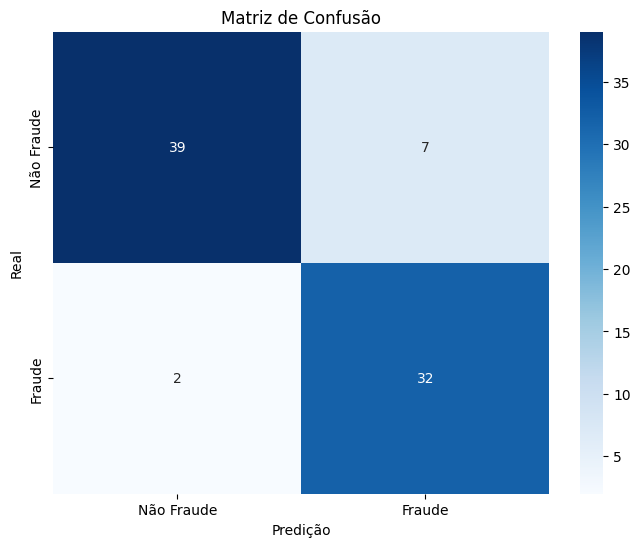

In [26]:
# Visualizar a matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Não Fraude', 'Fraude'], yticklabels=['Não Fraude', 'Fraude'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()